<a href="https://colab.research.google.com/github/SVKruik/ST-KR-J1/blob/main/Artificial%20Intelligence/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [34]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [35]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [36]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [ ]:
weight_decay = 5e-4
layers = tf.keras.layers
regularizers = tf.keras.regularizers

data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomTranslation(0.1, 0.1),
])

model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    layers.Rescaling(1./255),
    data_aug,

    # Block 1
    layers.Conv2D(64, 3, padding="same", use_bias=False,
                  kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64, 3, padding="same", use_bias=False,
                  kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.20),

    # Block 2
    layers.Conv2D(128, 3, padding="same", use_bias=False,
                  kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(128, 3, padding="same", use_bias=False,
                  kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.30),
    
    # Block 3
    layers.Conv2D(256, 3, padding="same", use_bias=False,
                  kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256, 3, padding="same", use_bias=False,
                  kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.40),

    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu",
                 kernel_regularizer=regularizers.l2(weight_decay)),
    layers.Dropout(0.40),
    layers.Dense(10, activation="softmax")
])

# Compile and Train neural network

In [38]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.3571 - loss: 2.1452
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.5476 - loss: 1.5070
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6064 - loss: 1.3837
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6408 - loss: 1.3046
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6784 - loss: 1.2449
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6971 - loss: 1.1938
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7196 - loss: 1.1394
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7296 - loss: 1.1117
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7439 - loss: 1.0762
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7484 - loss: 1.0647
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7536 - loss: 1.0476
Epoch 12

## Evaluate neural network performance


In [39]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.7606 - loss: 1.0513


[1.0512564182281494, 0.7605999708175659]

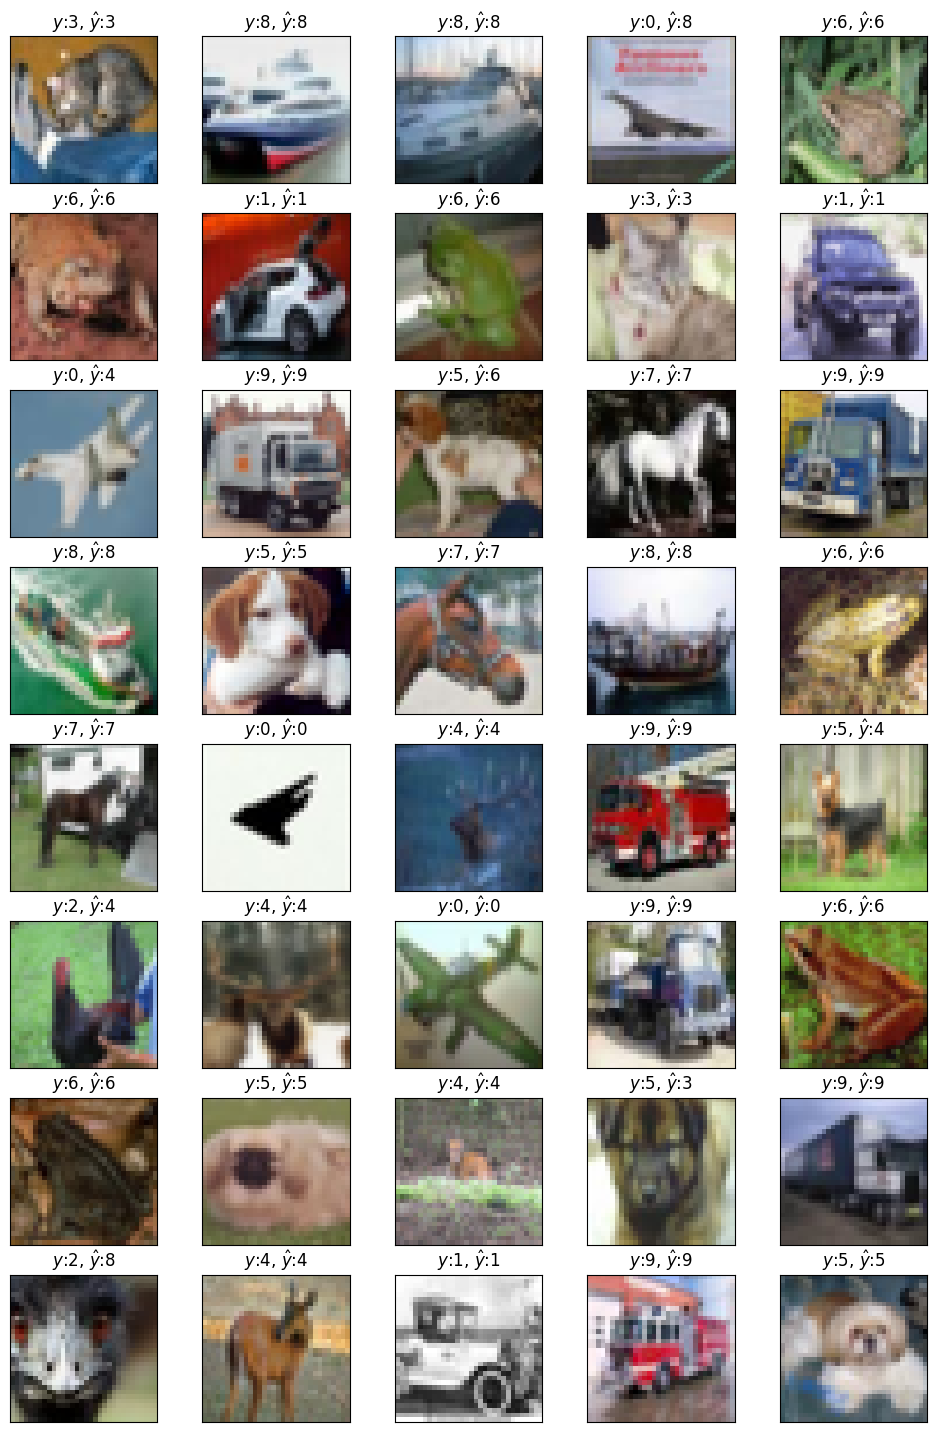

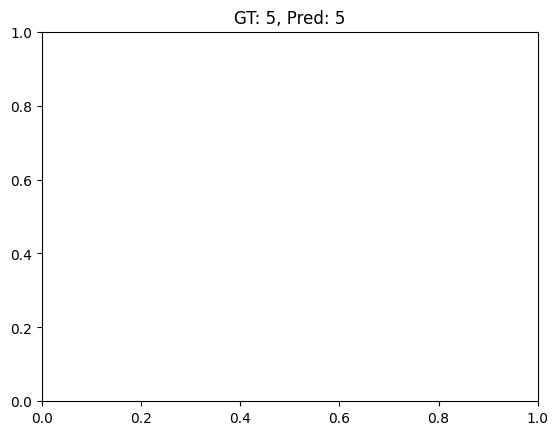

In [40]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [41]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7605999708175659
